In [123]:
import pandas as pd
import numpy as np
import seaborn as sns

import yfinance as yf


In [124]:
def extract_data(ticker_symbol,csv_location="data/"):
    stock_data = yf.download(ticker_symbol, period='max')
    df_stock = pd.DataFrame(stock_data)
    csv_filename = f"{ticker_symbol}_historical_data.csv"
    csv = csv_location + csv_filename
    df_stock.to_csv(csv)
    print(f"Data saved to {csv}")
    # return df_stock  # Optionally, return the DataFrame

In [125]:
if __name__ == "__main__":
    ticker_symbol = "TATACONSUM.NS"
    extract_data(ticker_symbol)

[*********************100%%**********************]  1 of 1 completed
Data saved to data/TATACONSUM.NS_historical_data.csv


In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [128]:

df=pd.read_csv("data/TATACONSUM.NS_historical_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,28.000000,28.219999,27.799999,27.805000,16.508287,23500
1,1996-01-02,27.805000,28.000000,27.305000,27.344999,16.235182,23000
2,1996-01-03,27.344999,27.700001,27.500000,27.545000,16.353930,21000
3,1996-01-04,27.545000,27.549999,27.000000,27.495001,16.324242,133000
4,1996-01-05,27.500000,27.500000,27.299999,27.379999,16.255959,114500


In [129]:
df.index

RangeIndex(start=0, stop=6973, step=1)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6973 non-null   object 
 1   Open       6973 non-null   float64
 2   High       6973 non-null   float64
 3   Low        6973 non-null   float64
 4   Close      6973 non-null   float64
 5   Adj Close  6973 non-null   float64
 6   Volume     6973 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 381.5+ KB


In [131]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6.973000e+03
mean,168.692519,171.020048,166.172382,168.475323,155.014067,3.444841e+06
std,215.194291,217.426611,212.663395,215.015525,215.831888,6.369219e+06
min,12.005000,12.600000,11.755000,11.860000,7.859629,0.000000e+00
25%,38.799999,39.645000,38.025002,38.810001,24.149424,8.764400e+05
50%,90.099998,91.769997,88.000000,89.699997,70.803574,1.642810e+06
75%,157.100006,159.300003,155.100006,156.800003,139.851044,3.145276e+06
max,907.599976,909.900024,891.500000,900.599976,900.599976,8.465800e+07


In [132]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: >

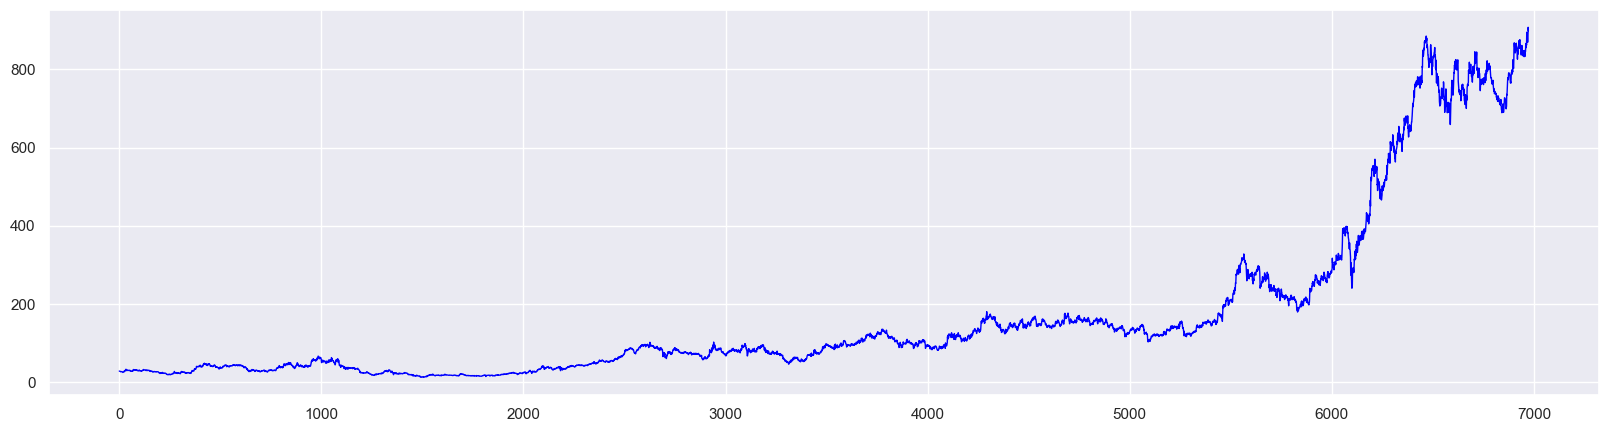

In [133]:
sns.set(rc={'figure.figsize' :(20,5)})
df['Open'].plot(linewidth=1,color='blue')

In [134]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [135]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df["Date"]

In [136]:
df.index

DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-08', '1996-01-09', '1996-01-10',
               '1996-01-11', '1996-01-12',
               ...
               '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-18',
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25',
               '2023-09-26', '2023-09-27'],
              dtype='datetime64[ns]', name='Date', length=6973, freq=None)

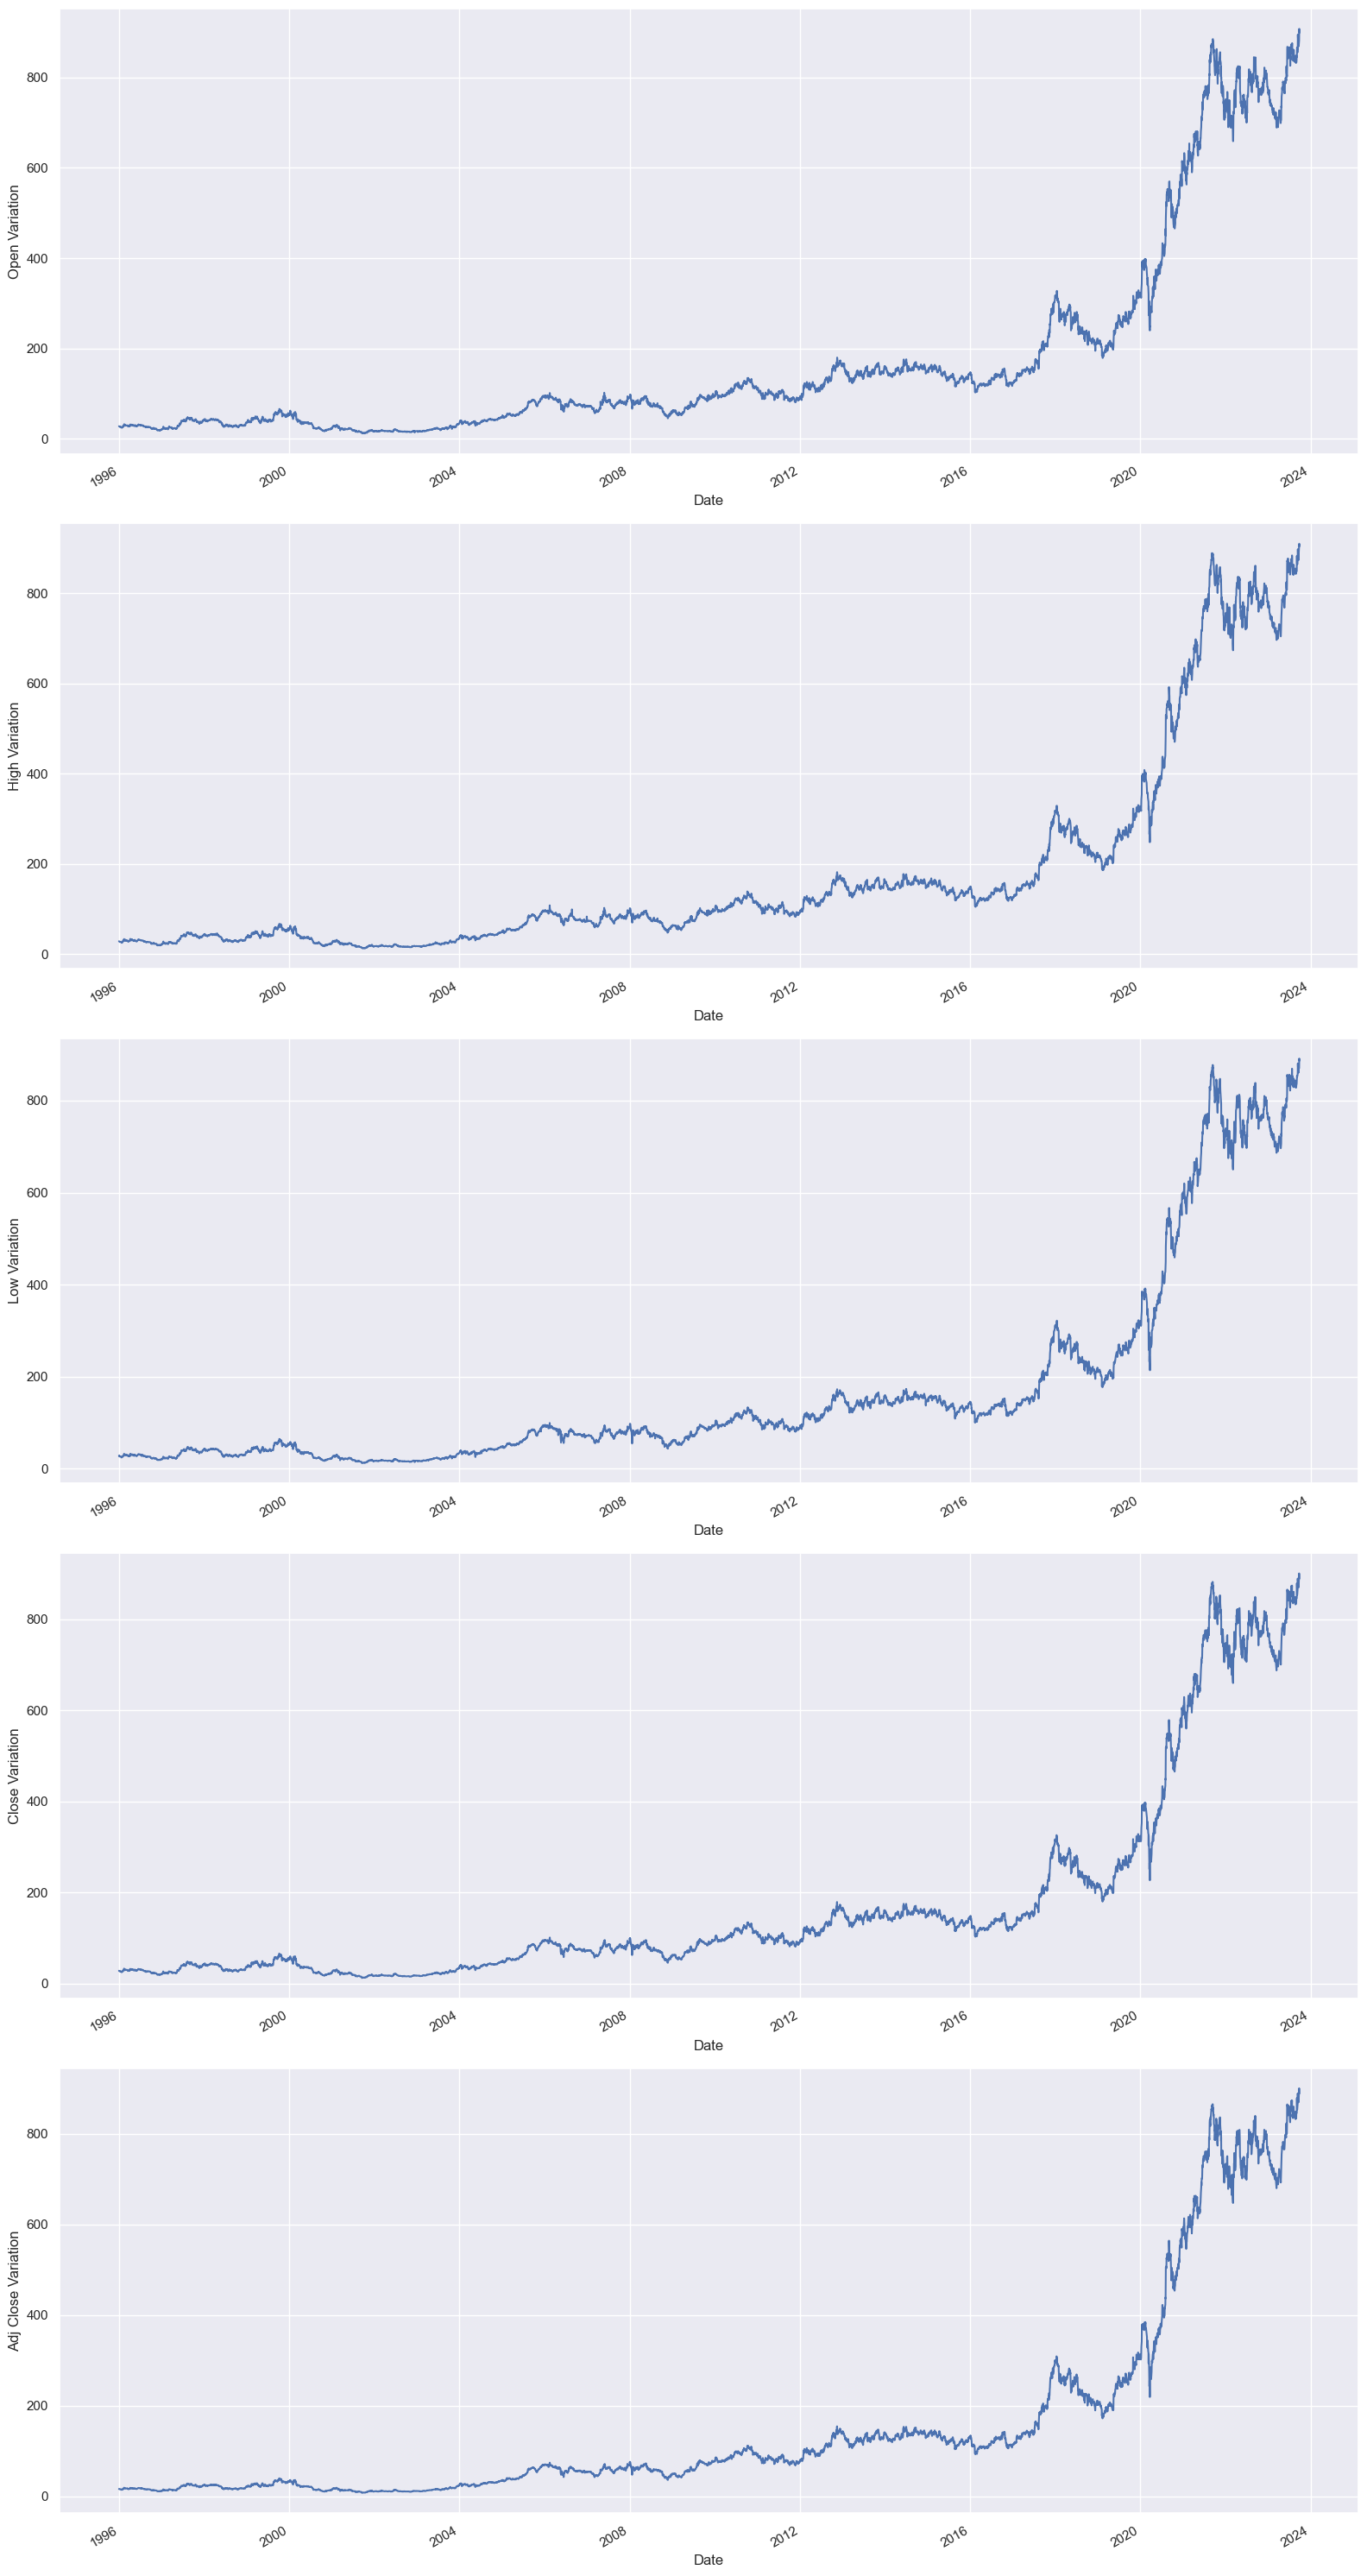

In [137]:
cols_plot=['Open','High','Low','Close','Adj Close']
fig,axes=plt.subplots(nrows=len(cols_plot),figsize=(16,6*len(cols_plot)))

for i, col in enumerate(cols_plot):
    df[col].plot(ax=axes[i], alpha=1)
    axes[i].set_ylabel(col + ' Variation')
    axes[i].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [138]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1996-01-01,1996-01-01,28.000000,28.219999,27.799999,27.805000,16.508287,23500
1996-01-02,1996-01-02,27.805000,28.000000,27.305000,27.344999,16.235182,23000
1996-01-03,1996-01-03,27.344999,27.700001,27.500000,27.545000,16.353930,21000
1996-01-04,1996-01-04,27.545000,27.549999,27.000000,27.495001,16.324242,133000
1996-01-05,1996-01-05,27.500000,27.500000,27.299999,27.379999,16.255959,114500


In [139]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1996-01-01,1996-01-01,28.000000,28.219999,27.799999,27.805000,16.508287,23500
1996-01-02,1996-01-02,27.805000,28.000000,27.305000,27.344999,16.235182,23000
1996-01-03,1996-01-03,27.344999,27.700001,27.500000,27.545000,16.353930,21000
1996-01-04,1996-01-04,27.545000,27.549999,27.000000,27.495001,16.324242,133000
1996-01-05,1996-01-05,27.500000,27.500000,27.299999,27.379999,16.255959,114500


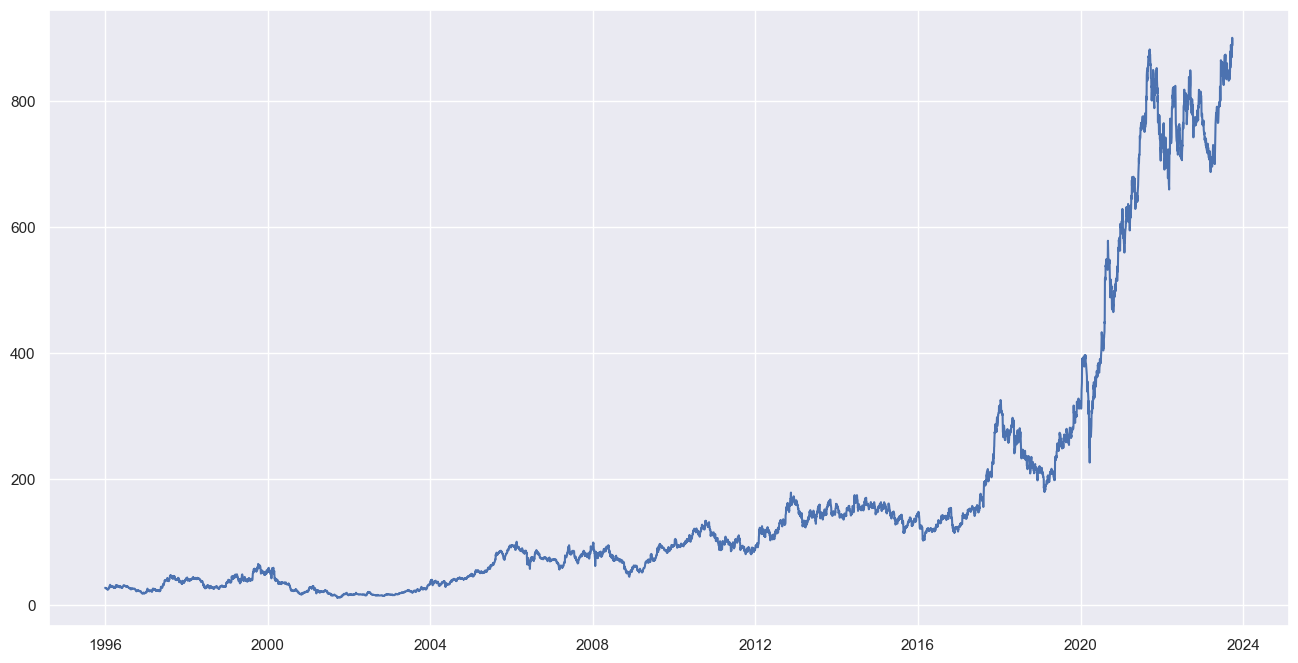

In [140]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [141]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [142]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [143]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1996-01-01,1996-01-01,28.000000,28.219999,27.799999,27.805000,16.508287,23500
1996-01-02,1996-01-02,27.805000,28.000000,27.305000,27.344999,16.235182,23000
1996-01-03,1996-01-03,27.344999,27.700001,27.500000,27.545000,16.353930,21000
1996-01-04,1996-01-04,27.545000,27.549999,27.000000,27.495001,16.324242,133000
1996-01-05,1996-01-05,27.500000,27.500000,27.299999,27.379999,16.255959,114500
...,...,...,...,...,...,...,...
2023-09-21,2023-09-21,869.000000,874.000000,861.200012,871.000000,871.000000,1165593
2023-09-22,2023-09-22,871.000000,889.849976,870.049988,877.750000,877.750000,1518828
2023-09-25,2023-09-25,881.950012,905.599976,870.549988,900.599976,900.599976,2700627


In [144]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1996-01-01,1996-01-01,28.000000,28.219999,27.799999,27.805000,16.508287,23500
1996-01-02,1996-01-02,27.805000,28.000000,27.305000,27.344999,16.235182,23000
1996-01-03,1996-01-03,27.344999,27.700001,27.500000,27.545000,16.353930,21000
1996-01-04,1996-01-04,27.545000,27.549999,27.000000,27.495001,16.324242,133000
1996-01-05,1996-01-05,27.500000,27.500000,27.299999,27.379999,16.255959,114500
...,...,...,...,...,...,...,...
2023-09-21,2023-09-21,869.000000,874.000000,861.200012,871.000000,871.000000,1165593
2023-09-22,2023-09-22,871.000000,889.849976,870.049988,877.750000,877.750000,1518828
2023-09-25,2023-09-25,881.950012,905.599976,870.549988,900.599976,900.599976,2700627


In [145]:
new_dataset = data[['Date', 'Close']].copy()
new_dataset.tail()

,Date,Close
Date,,
2023-09-21,2023-09-21,871.000000
2023-09-22,2023-09-22,877.750000
2023-09-25,2023-09-25,900.599976
2023-09-26,2023-09-26,895.200012
2023-09-27,2023-09-27,888.849976


In [146]:
new_dataset.head()


,Date,Close
Date,,
1996-01-01,1996-01-01,27.805000
1996-01-02,1996-01-02,27.344999
1996-01-03,1996-01-03,27.545000
1996-01-04,1996-01-04,27.495001
1996-01-05,1996-01-05,27.379999


In [147]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [148]:
new_dataset.head()

,Close
Date,
1996-01-01,27.805000
1996-01-02,27.344999
1996-01-03,27.545000
1996-01-04,27.495001
1996-01-05,27.379999


In [149]:
final_dataset=new_dataset.values

In [150]:
final_dataset
# len(final_dataset)

array([[ 27.80500031],
       [ 27.34499931],
       [ 27.54500008],
       ...,
       [900.59997559],
       [895.20001221],
       [888.84997559]])

In [151]:
len(final_dataset)

6973

In [152]:
final_dataset.shape[0]

6973

In [153]:
total_sample = final_dataset.shape[0]
train_sample = int(0.7 * total_sample)

In [154]:
train_sample

4881

In [155]:
train_data=final_dataset[0:train_sample,:]
valid_data=final_dataset[train_sample:,:]

In [156]:
len(train_data)


4881

In [157]:
len(valid_data)

2092

In [158]:
len(train_data) + len(valid_data) == len(final_dataset)

True

In [159]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [160]:
scaled_data
# len(scaled_data)

array([[0.01794113],
       [0.01742354],
       [0.01764858],
       ...,
       [1.        ],
       [0.99392402],
       [0.98677904]])

In [161]:
x_train_data,y_train_data=[],[]

In [162]:
scaled_data[0:60,0]


array([0.01794113, 0.01742354, 0.01764858, 0.01759232, 0.01746292,
       0.01689471, 0.01632086, 0.01634336, 0.01661341, 0.01691721,
       0.01647276, 0.01636587, 0.01630961, 0.01614645, 0.01596642,
       0.01571326, 0.01427302, 0.01443054, 0.01467246, 0.01467246,
       0.0155276 , 0.01568513, 0.01579765, 0.01647276, 0.01795801,
       0.01785112, 0.01699035, 0.01783424, 0.01916196, 0.02051219,
       0.0217724 , 0.02261629, 0.02321264, 0.02291446, 0.02153611,
       0.0205797 , 0.01931949, 0.01931949, 0.0211873 , 0.02127732,
       0.02108041, 0.02073723, 0.02041092, 0.01973581, 0.01988771,
       0.01988771, 0.01988771, 0.020124  , 0.02025339, 0.02007899,
       0.01984833, 0.01939825, 0.02012962, 0.01956703, 0.01906069,
       0.01759795, 0.01746292, 0.01746292, 0.01816054, 0.01782299])

In [163]:
scaled_data[120,0]

0.022301236790631458

In [164]:
len(scaled_data[0:60,0])

60

In [165]:
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [166]:
x_train_data

[array([0.01794113, 0.01742354, 0.01764858, 0.01759232, 0.01746292,
        0.01689471, 0.01632086, 0.01634336, 0.01661341, 0.01691721,
        0.01647276, 0.01636587, 0.01630961, 0.01614645, 0.01596642,
        0.01571326, 0.01427302, 0.01443054, 0.01467246, 0.01467246,
        0.0155276 , 0.01568513, 0.01579765, 0.01647276, 0.01795801,
        0.01785112, 0.01699035, 0.01783424, 0.01916196, 0.02051219,
        0.0217724 , 0.02261629, 0.02321264, 0.02291446, 0.02153611,
        0.0205797 , 0.01931949, 0.01931949, 0.0211873 , 0.02127732,
        0.02108041, 0.02073723, 0.02041092, 0.01973581, 0.01988771,
        0.01988771, 0.01988771, 0.020124  , 0.02025339, 0.02007899,
        0.01984833, 0.01939825, 0.02012962, 0.01956703, 0.01906069,
        0.01759795, 0.01746292, 0.01746292, 0.01816054, 0.01782299]),
 array([0.01742354, 0.01764858, 0.01759232, 0.01746292, 0.01689471,
        0.01632086, 0.01634336, 0.01661341, 0.01691721, 0.01647276,
        0.01636587, 0.01630961, 0.01614645, 0.

In [167]:
y_train_data

[0.017828612075721458,
 0.017603573517362102,
 0.018267434903782784,
 0.018526229889734076,
 0.0178398642182521,
 0.018329320614637955,
 0.01804802348975213,
 0.019116953422768965,
 0.02222809893724565,
 0.02222809893724565,
 0.022481266778868247,
 0.021412336845851407,
 0.021811780394245604,
 0.02129981971279847,
 0.020405294769816472,
 0.020349034057163262,
 0.01978081480918966,
 0.021125414722763636,
 0.022143711087455956,
 0.021806153249916915,
 0.020900376164404273,
 0.02058532475805326,
 0.02167675683000464,
 0.021417963990180103,
 0.02083849045354911,
 0.02070909403363684,
 0.019882081945838695,
 0.020799109027755232,
 0.02028152334810615,
 0.019544524108299655,
 0.01913945770783025,
 0.019876454801510006,
 0.019915836227303876,
 0.019291356266677058,
 0.018813152012821847,
 0.018627497026383118,
 0.018773770587027977,
 0.02059094975625521,
 0.021147919007824915,
 0.02047843047707553,
 0.01913945770783025,
 0.01925197484088318,
 0.019133830563501555,
 0.01887503772367702,
 0.018

In [168]:
len(x_train_data)

4821

In [169]:
len(y_train_data)

4821

In [170]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)


In [171]:
x_train_data

array([[0.01794113, 0.01742354, 0.01764858, ..., 0.01746292, 0.01816054,
        0.01782299],
       [0.01742354, 0.01764858, 0.01759232, ..., 0.01816054, 0.01782299,
        0.01782861],
       [0.01764858, 0.01759232, 0.01746292, ..., 0.01782299, 0.01782861,
        0.01760357],
       ...,
       [0.15368949, 0.15959673, 0.1617346 , ..., 0.15667125, 0.15706506,
        0.15667125],
       [0.15959673, 0.1617346 , 0.16370368, ..., 0.15706506, 0.15667125,
        0.15723385],
       [0.1617346 , 0.16370368, 0.16134078, ..., 0.15667125, 0.15723385,
        0.15774018]])

In [172]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [173]:
x_train_data

array([[[0.01794113],
        [0.01742354],
        [0.01764858],
        ...,
        [0.01746292],
        [0.01816054],
        [0.01782299]],

       [[0.01742354],
        [0.01764858],
        [0.01759232],
        ...,
        [0.01816054],
        [0.01782299],
        [0.01782861]],

       [[0.01764858],
        [0.01759232],
        [0.01746292],
        ...,
        [0.01782299],
        [0.01782861],
        [0.01760357]],

       ...,

       [[0.15368949],
        [0.15959673],
        [0.1617346 ],
        ...,
        [0.15667125],
        [0.15706506],
        [0.15667125]],

       [[0.15959673],
        [0.1617346 ],
        [0.16370368],
        ...,
        [0.15706506],
        [0.15667125],
        [0.15723385]],

       [[0.1617346 ],
        [0.16370368],
        [0.16134078],
        ...,
        [0.15667125],
        [0.15723385],
        [0.15774018]]])

In [174]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


In [175]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

4821/4821 - 84s - loss: 5.1652e-05 - 84s/epoch - 18ms/step


In [176]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [177]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [178]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [179]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

66/66 [==============================] - 2s 10ms/step


In [180]:
lstm_model.save("data/saved_lstm_model.h5")

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


C:\Users\parme\AppData\Local\Temp\ipykernel_11732\1958506444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=closing_price


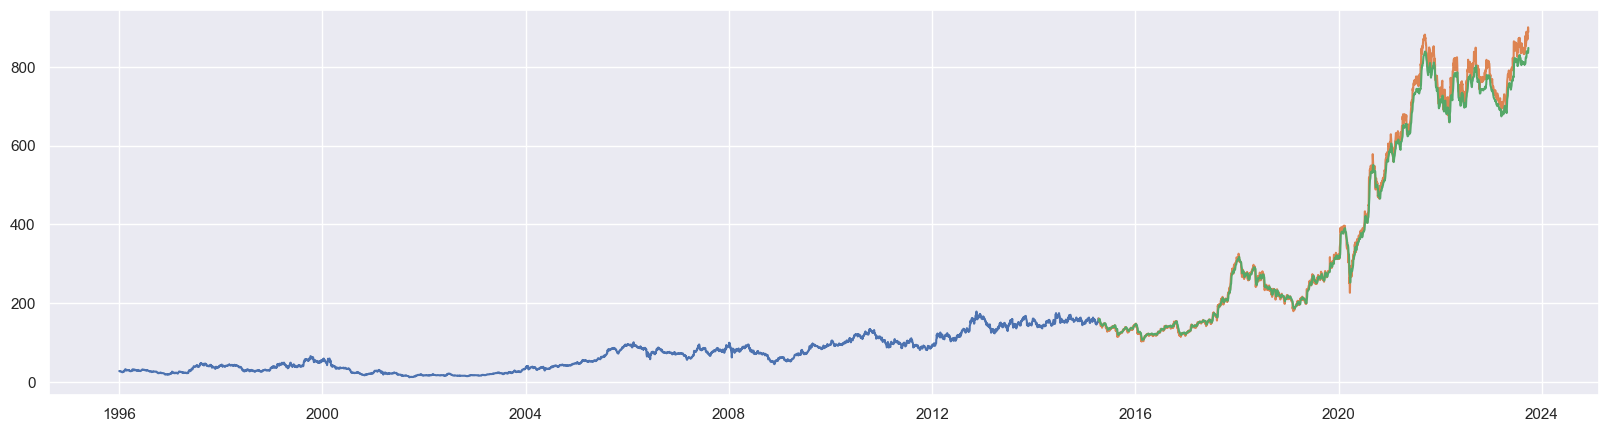

In [181]:
train_data=new_dataset[:train_sample]
valid_data=new_dataset[train_sample:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

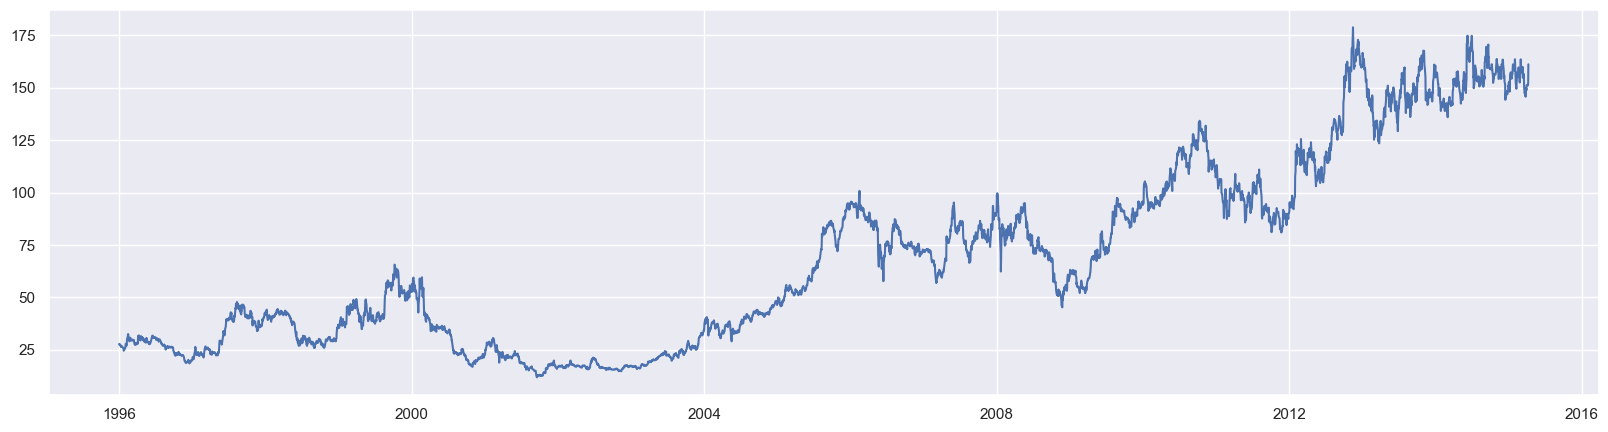

In [182]:
plt.plot(train_data["Close"])

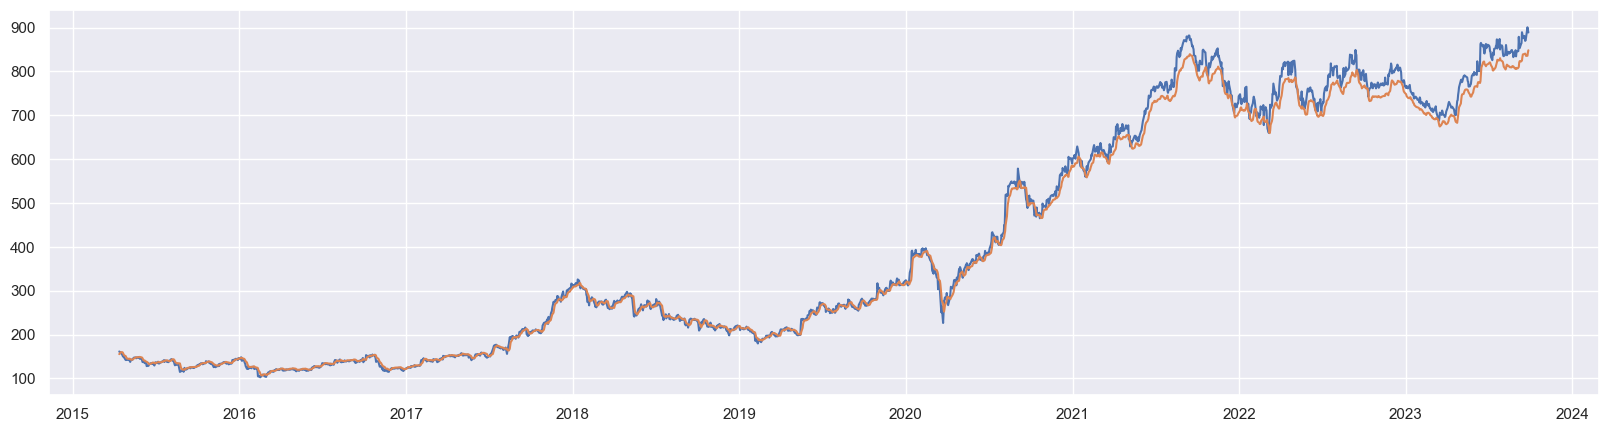

In [183]:
plt.plot(valid_data[['Close',"Predictions"]])